I used Men-Women Classification Datset From Kaggle
Link : https://www.kaggle.com/datasets/saadpd/menwomen-classification

In [1]:
import os , shutil, pathlib
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'   # hides INFO/WARNING logs from TF C++
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
# dataset_dir = r"/home/hamid/ML/Datasets/Men-Women/"
# num_train = len(os.listdir(dataset_dir + r"/traindata/traindata/men/"))

In [3]:
original_dir = pathlib.Path(r"/home/hamid/ML/Datasets/Men-Women/traindata/traindata/")
new_base_dir = pathlib.Path(r"/home/hamid/ML/Datasets/Men-Women-small")

In [4]:
def make_subset(subset_name , start_index, end_index):
    if (new_base_dir / subset_name).exists():
        shutil.rmtree(new_base_dir / subset_name)
    for category in ("men" , "women"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg"
                 for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src = original_dir / category / fname , dst = dir / fname)
make_subset("train" , start_index = 0, end_index = 1000)
make_subset("validation" , start_index = 1000, end_index = 1200)
make_subset("test" , start_index = 1200, end_index = 1400)

In [5]:
train_dataset = image_dataset_from_directory(
    r"/home/hamid/ML/Datasets/Men-Women-small/train",
    image_size = (180 , 180),
    batch_size = 32 ,
    label_mode = "binary"
)

validation_dataset = image_dataset_from_directory(
    r"/home/hamid/ML/Datasets/Men-Women-small/validation",
    image_size = (180 , 180),
    batch_size = 32 ,
    label_mode = "binary"
)

test_dataset = image_dataset_from_directory(
    r"/home/hamid/ML/Datasets/Men-Women-small/test",
    image_size = (180 , 180),
    batch_size = 32 ,
    label_mode = "binary"
)

Found 2000 files belonging to 2 classes.


I0000 00:00:1765041962.942026  264398 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4198 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 400 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


In [6]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [7]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1.0 / 255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,569,089 (5.99 MB)

 Trainable params: 1,569,089 (5.99 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

In [9]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    train_dataset,
    epochs=75,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.5315 - loss: 0.6974 - val_accuracy: 0.5650 - val_loss: 0.6824
Epoch 2/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6065 - loss: 0.6711 - val_accuracy: 0.5550 - val_loss: 0.6836
Epoch 3/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5940 - loss: 0.6690 - val_accuracy: 0.6075 - val_loss: 0.6587
Epoch 4/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6375 - loss: 0.6513 - val_accuracy: 0.6150 - val_loss: 0.6530
Epoch 5/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6445 - loss: 0.6404 - val_accuracy: 0.5825 - val_loss: 0.6523
Epoch 6/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6435 - loss: 0.6411 - val_accuracy: 0.6075 - val_loss: 0.6352
Epoch 7/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6320 - loss: 0.6415 - val_accuracy: 0.6175 - val_loss: 0.6444
Epoch 8/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6425 - loss: 0.6338 - val_accuracy: 0.6300 - v

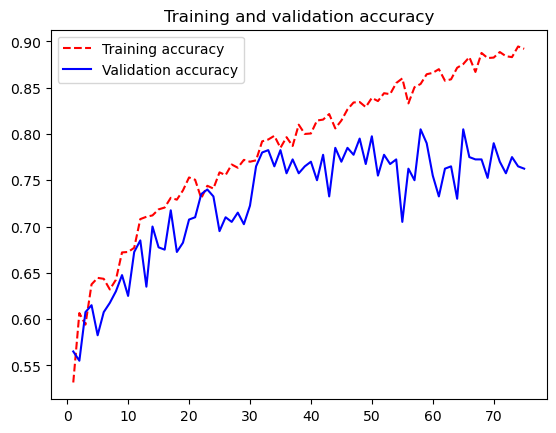

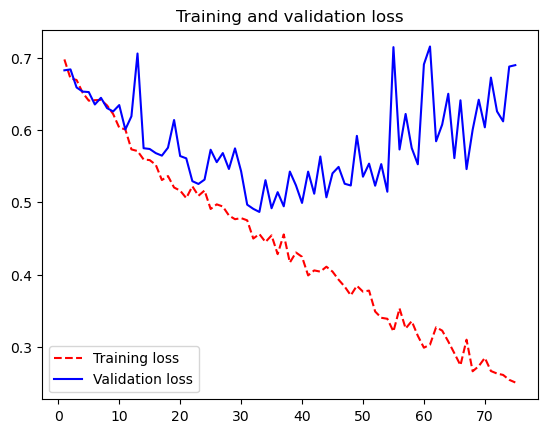

In [10]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "r--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


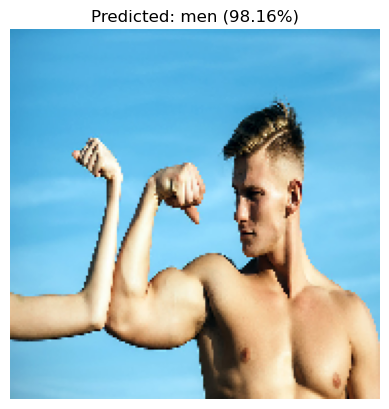

Raw Score: 0.0184
Final Prediction: men


In [11]:
# ---- CONFIG ----
img_path = "/home/hamid/Downloads/Picture/test4.jpg"
img_height = 180   
img_width = 180
# ترتیب کلاس‌ها در دیتاست شما: ['men', 'women']
# یعنی 0 -> men و 1 -> women

# ---- LOAD IMAGE ----
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # تبدیل به بچ (1, 180, 180, 3)

# ❌ خط زیر را حذف کنید چون لایه اول مدل شما خودش این کار را انجام می‌دهد
# img_array = img_array / 255.0  

# ---- PREDICT ----
predictions = model.predict(img_array)
score = predictions[0][0]  # خروجی یک عدد بین ۰ و ۱ است

# تفسیر خروجی سیگمید:
# اگر عدد به 0 نزدیک باشد -> کلاس 0 (men)
# اگر عدد به 1 نزدیک باشد -> کلاس 1 (women)

if score >= 0.5:
    predicted_label = "women"
    confidence = score * 100
else:
    predicted_label = "men"
    confidence = (1 - score) * 100

plt.imshow(img)
plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
plt.axis("off")
plt.show()

print(f"Raw Score: {score:.4f}")
print(f"Final Prediction: {predicted_label}")